In [1]:
import numpy
from numba import jit
import matplotlib.pyplot as plt

In [2]:
@jit
def mandelbrot(Re,Im,max_iter):
    c = complex(Re, Im)
    z =0
    
    for i in range(max_iter):
        z = z**2 + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
    return max_iter

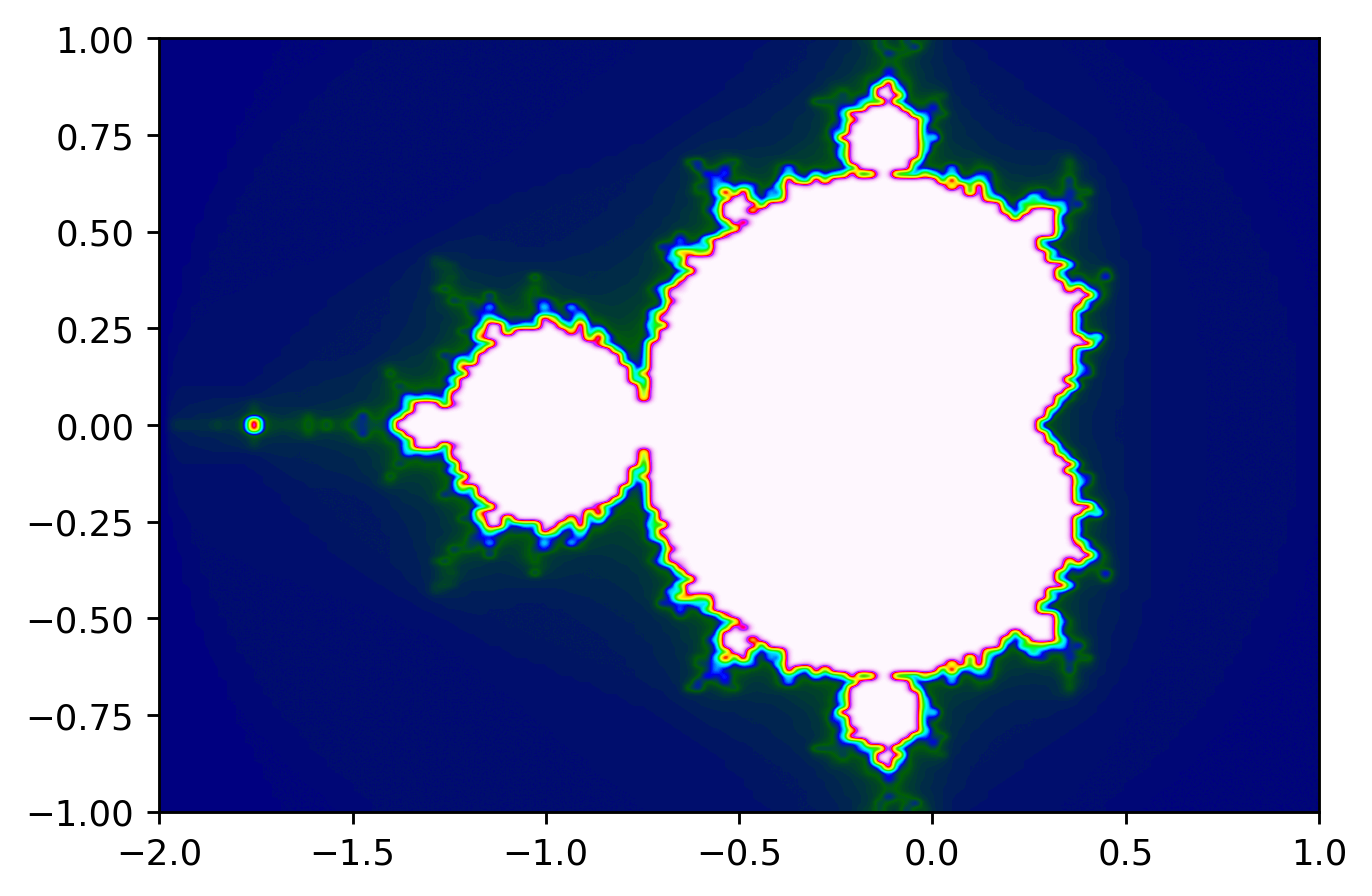

In [3]:
pic_no = 1
# POI:   -0.7474 +0j; 0.25+0j; fibonacci_blobs; 0.283-0.0155j; 
for n in range(1,pic_no+1):
    offset_x = 0.0
    offset_y = 0.0
    zoom = 2**0                
    columns = 2**6 + n*2**6           #resolution
    rows = columns
    iter_lim =2**8            #depth
    rl_ng = -2.0/zoom + offset_x
    rl_pt =  1.0/zoom + offset_x
    img_ng =-1.0/zoom + offset_y
    img_pt = 1.0/zoom + offset_y
    result = numpy.zeros([rows,columns])
    for row_index, Re in enumerate(numpy.linspace(rl_ng,rl_pt,num=rows)):
        for column_index, Im in enumerate(numpy.linspace(img_ng,img_pt, num = columns)):
            result[row_index,column_index] = mandelbrot(Re, Im, iter_lim)                            #affects resolution 10:7sec, 12(1024x): 23sec, 12(2048x):90, 14(1024x1024):90sec, 14(2048x):
    plt.figure(dpi=256) 
    plt.imshow(result.T, cmap="gist_ncar", interpolation = 'gaussian', extent = [rl_ng,rl_pt,img_ng,img_pt]) #colormap = "prism"
    plt.show
#help(plt.imshow)